In [1]:
%run "0. config.ipynb"

1887


In [2]:
players_stats = pd.DataFrame.from_csv("data/players_stats.csv", encoding="utf8")

# profiling players that complete the game

In [13]:
players_stats[ players_stats["complete"] == 1 ].mean()

complete                1.000000
configure               0.000000
craft                   1.090909
death                   6.818182
equip                   3.454545
gotomooc                0.000000
gotourl                 0.409091
pickup                  3.090909
reach                   8.136364
restart                 0.045455
selectmenu              1.181818
start                   0.500000
switch                  0.000000
unequip                 0.500000
duration (seconds)    718.681818
section                 8.000000
dtype: float64

# simple decision tree

In [3]:
from sklearn import tree

In [4]:
players_stats.head(5)

,complete,configure,craft,death,equip,gotomooc,gotourl,pickup,reach,restart,selectmenu,start,switch,unequip,duration (seconds),section
playerId,,,,,,,,,,,,,,,,
0023dbb1-7f98-4cdb-8122-722f801f40b3,0,1,0,3,0,0,0,1,2,0,1,0,0,0,175,2
01b0c435-f0c0-4bfd-9189-86fc0d29b163,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
02bc076b-32aa-467a-bbc6-b746abedb7bd,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
02c6953a-0417-4858-8efb-1989be9f6b9d,0,1,0,0,0,0,0,0,1,0,2,1,1,0,19,1
0306db66-081d-4035-b30f-8358469d6ec3,1,0,3,17,8,0,1,5,12,1,2,0,0,2,1030,8


In [15]:
X = players_stats[ [ c for c in players_stats.columns if c not in [ "complete" ] ] ].as_matrix()
Y = players_stats["complete"].as_matrix()

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

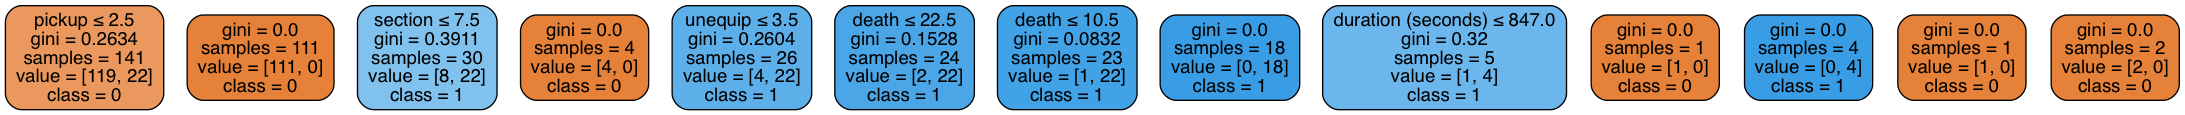

In [16]:
from IPython.display import Image  
from StringIO import StringIO

import pydot

dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=[ c for c in players_stats.columns if c not in [ "complete" ] ],  
                         class_names= [ str(c) for c in range(0,2) ],
                         filled=True, rounded=True,  
                         special_characters=True)  

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

In [25]:
X_uncompleted = players_stats[ players_stats["complete"] == 0 ]
X_uncompleted = X_uncompleted[ [ c for c in players_stats.columns if c not in [ "complete" ] ] ].as_matrix()

p = clf.predict(X)

print sum(p)

22.0


# sequential approach

Create data with progression within games instead of just finished games